In [ ]:
百度接口（1）小票识别+票体主题内容处理

https://cungudafa.blog.csdn.net/article/details/119409378

In [34]:

# encoding:utf-8

import requests
import base64

'''
通用文字识别
'''

request_url = "https://aip.baidubce.com/rest/2.0/ocr/v1/general_basic"
# 二进制方式打开图片文件
f = open('xiaopiao2.jpg', 'rb')
img = base64.b64encode(f.read())

params = {"image":img}

request_url = request_url + "?access_token=" + access_token
headers = {'content-type': 'application/x-www-form-urlencoded'}
response = requests.post(request_url, data=params, headers=headers)
if response:
    print (response.json())

{'words_result': [{'words': '每日太阳城'}, {'words': '交易一'}, {'words': '店内码'}, {'words': '品名'}, {'words': '零售价数量优惠小计'}, {'words': '20402007板栗绿豆糕(盒装)'}, {'words': '4,50'}, {'words': '10.00'}, {'words': '50'}, {'words': '30300056可乐儿9014铅志0,5/0'}, {'words': '1.0'}, {'words': '10.001.00'}, {'words': '20412096出没巧克力棒巧克'}, {'words': '2.30'}, {'words': '0.002,90'}, {'words': '20605006乐事片40g番茄味'}, {'words': '3,50'}, {'words': '10.003.50'}, {'words': '2080007宏源陈皮糖806'}, {'words': '2.80'}, {'words': '10.002.80'}, {'words': '20401022中洋宝蛋糕-香芋969'}, {'words': '3.90'}, {'words': '10.003.90'}, {'words': '中号袋'}, {'words': '0.2010.000.20'}, {'words': '二二二二二'}, {'words': '累计件数:7原价合计:18.80'}, {'words': '应付金额:18.80'}, {'words': '非促销总金额'}, {'words': '80'}, {'words': '实付金额:20.00找零:1.20'}, {'words': '现金:18.80'}, {'words': '收款员:1008收款机:005'}, {'words': 'N.00050075580'}, {'words': '时间:2019-02-1917:07:51'}, {'words': '电话:0579-8203031'}, {'words': '地址:金华市太阳城7号楼'}, {'words': '(近风山街)'}], 'words_result_num': 39, 'log_id'

In [32]:

# encoding:utf-8

import requests
import base64
import json
'''
通用票据识别
'''

request_url = "https://aip.baidubce.com/rest/2.0/ocr/v1/receipt"
# 二进制方式打开图片文件
f = open('xiaopiao2.jpg', 'rb')
img = base64.b64encode(f.read())

params = {"image":img}

request_url = request_url + "?access_token=" + access_token
headers = {'content-type': 'application/x-www-form-urlencoded'}
response = requests.post(request_url, data=params, headers=headers)
if response:
    print (response.json())
    print (json.dumps(response.json(),indent=1,ensure_ascii=False))

{'words_result': [{'words': '每鲜太阳城', 'location': {'top': 88, 'left': 76, 'width': 233, 'height': 23}}, {'words': '交易', 'location': {'top': 109, 'left': 181, 'width': 34, 'height': 19}}, {'words': '店内码', 'location': {'top': 131, 'left': 54, 'width': 54, 'height': 18}}, {'words': '品名', 'location': {'top': 131, 'left': 171, 'width': 36, 'height': 18}}, {'words': '零售价数量优惠小计', 'location': {'top': 150, 'left': 72, 'width': 268, 'height': 21}}, {'words': '20402007板绿豆糕(盒装)1', 'location': {'top': 171, 'left': 55, 'width': 285, 'height': 19}}, {'words': '4.50', 'location': {'top': 193, 'left': 86, 'width': 37, 'height': 19}}, {'words': '0.004.50', 'location': {'top': 189, 'left': 221, 'width': 122, 'height': 22}}, {'words': '3300056可乐儿9014铅芯0.5/0', 'location': {'top': 213, 'left': 52, 'width': 290, 'height': 21}}, {'words': '1.00', 'location': {'top': 237, 'left': 86, 'width': 37, 'height': 18}}, {'words': '10.001.00', 'location': {'top': 233, 'left': 176, 'width': 167, 'height': 22}}, {'words':

In [91]:
import json
import re
# json处理
response = {'words_result': [{'words': '每鲜太阳城', 'location': {'top': 88, 'left': 76, 'width': 233, 'height': 23}}, {'words': '交易', 'location': {'top': 109, 'left': 181, 'width': 34, 'height': 19}}, {'words': '店内码', 'location': {'top': 131, 'left': 54, 'width': 54, 'height': 18}}, {'words': '品名', 'location': {'top': 131, 'left': 171, 'width': 36, 'height': 18}}, {'words': '零售价数量优惠小计', 'location': {'top': 150, 'left': 72, 'width': 268, 'height': 21}}, {'words': '20402007板绿豆糕(盒装)1', 'location': {'top': 171, 'left': 55, 'width': 285, 'height': 19}}, {'words': '4.50', 'location': {'top': 193, 'left': 86, 'width': 37, 'height': 19}}, {'words': '0.004.50', 'location': {'top': 189, 'left': 221, 'width': 122, 'height': 22}}, {'words': '3300056可乐儿9014铅芯0.5/0', 'location': {'top': 213, 'left': 52, 'width': 290, 'height': 21}}, {'words': '1.00', 'location': {'top': 237, 'left': 86, 'width': 37, 'height': 18}}, {'words': '10.001.00', 'location': {'top': 233, 'left': 176, 'width': 167, 'height': 22}}, {'words': '20412096熊出没巧克力棒巧克', 'location': {'top': 257, 'left': 48, 'width': 285, 'height': 21}}, {'words': '2.9010.002,90', 'location': {'top': 277, 'left': 83, 'width': 262, 'height': 24}}, {'words': '20605006乐事片40g番茄味', 'location': {'top': 303, 'left': 47, 'width': 279, 'height': 21}}, {'words': '3.50', 'location': {'top': 327, 'left': 81, 'width': 41, 'height': 21}}, {'words': '0.003.50', 'location': {'top': 323, 'left': 221, 'width': 122, 'height': 21}}, {'words': '2800097宏源陈皮糖80G', 'location': {'top': 348, 'left': 45, 'width': 245, 'height': 24}}, {'words': '2.8010.002.80', 'location': {'top': 368, 'left': 80, 'width': 264, 'height': 25}}, {'words': '2401022中洋宝蛋糕-香芋96g*', 'location': {'top': 392, 'left': 42, 'width': 305, 'height': 26}}, {'words': '3.90', 'location': {'top': 420, 'left': 79, 'width': 37, 'height': 20}}, {'words': '10.003.90', 'location': {'top': 415, 'left': 174, 'width': 176, 'height': 23}}, {'words': '中号袋', 'location': {'top': 442, 'left': 167, 'width': 58, 'height': 23}}, {'words': '0.2010.000.20', 'location': {'top': 462, 'left': 77, 'width': 275, 'height': 28}}, {'words': '累计件数:7原价合计:18.80', 'location': {'top': 514, 'left': 36, 'width': 258, 'height': 30}}, {'words': '应付金额;18.80', 'location': {'top': 542, 'left': 35, 'width': 151, 'height': 24}}, {'words': '非促销总金额:18.80', 'location': {'top': 563, 'left': 34, 'width': 214, 'height': 29}}, {'words': '实付金额:20.00找零:1.20', 'location': {'top': 590, 'left': 32, 'width': 293, 'height': 30}}, {'words': '现金:18.80', 'location': {'top': 644, 'left': 29, 'width': 147, 'height': 27}}, {'words': '收款员:1008收款机:0005', 'location': {'top': 699, 'left': 26, 'width': 231, 'height': 28}}, {'words': 'N.000500075580', 'location': {'top': 729, 'left': 24, 'width': 158, 'height': 27}}, {'words': '时间:2019-02-1917:07:51', 'location': {'top': 752, 'left': 23, 'width': 252, 'height': 35}}, {'words': '电话:0579-82030313', 'location': {'top': 783, 'left': 21, 'width': 206, 'height': 32}}, {'words': '地址:金华市太阳城7号楼', 'location': {'top': 813, 'left': 20, 'width': 250, 'height': 31}}, {'words': '(近凤山街)', 'location': {'top': 845, 'left': 84, 'width': 111, 'height': 28}}], 'words_result_num': 34, 'log_id': 1423140902004030023}

# print (json.dumps(response,indent=1,ensure_ascii=False))
for idx in response['words_result']:
    
    print(idx['words'])

每鲜太阳城
交易
店内码
品名
零售价数量优惠小计
20402007板绿豆糕(盒装)1
4.50
0.004.50
3300056可乐儿9014铅芯0.5/0
1.00
10.001.00
20412096熊出没巧克力棒巧克
2.9010.002,90
20605006乐事片40g番茄味
3.50
0.003.50
2800097宏源陈皮糖80G
2.8010.002.80
2401022中洋宝蛋糕-香芋96g*
3.90
10.003.90
中号袋
0.2010.000.20
累计件数:7原价合计:18.80
应付金额;18.80
非促销总金额:18.80
实付金额:20.00找零:1.20
现金:18.80
收款员:1008收款机:0005
N.000500075580
时间:2019-02-1917:07:51
电话:0579-82030313
地址:金华市太阳城7号楼
(近凤山街)


零售价数量优惠小计 ( 150 , 72 )
累计件数:7原价合计:18.80 ( 514 , 294 )

小票识别主体wordList


 ['板绿豆糕盒装', '可乐儿铅芯', '熊出没巧克力棒巧克', '乐事片番茄味', '宏源陈皮糖', '中洋宝蛋糕香芋', '中号袋']
板绿豆糕盒装 绿豆糕
可乐儿铅芯 可乐
熊出没巧克力棒巧克 其他
乐事片番茄味 乐事
宏源陈皮糖 糖
中洋宝蛋糕香芋 蛋糕
中号袋 其他


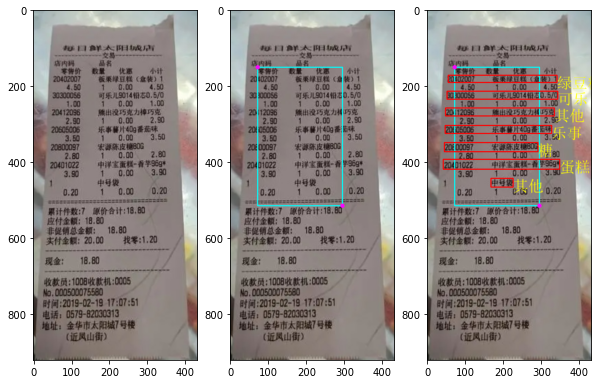

[{'板绿豆糕盒装', '绿豆糕'}, {'可乐', '可乐儿铅芯'}, {'其他', '熊出没巧克力棒巧克'}, {'乐事', '乐事片番茄味'}, {'宏源陈皮糖', '糖'}, {'中洋宝蛋糕香芋', '蛋糕'}, {'中号袋', '其他'}]


In [67]:
# encoding:utf-8

import requests
import base64
import json
import re
# 图像处理
import numpy as np
import cv2
from matplotlib import pyplot as plt
from urllib import request
from PIL import Image, ImageDraw, ImageFont


'''
通用票据识别
'''

def getToken(AccessKey,SecretKey):
    # client_id 为官网获取的AK， client_secret 为官网获取的SK
    host = 'https://aip.baidubce.com/oauth/2.0/token?grant_type=client_credentials&client_id='+AccessKey+'&client_secret='+SecretKey
    headers = {
        'Content-Type': 'application/json;charset=UTF-8'
    }
    access_token = ''
    response = requests.get(url=host, headers=headers)
    if response:
        res = response.json()
        access_token = res['access_token']
    return access_token

def getResult(url,access_token):
    request_url = "https://aip.baidubce.com/rest/2.0/ocr/v1/receipt"
    # 二进制方式打开图片文件
    f = open(url, 'rb')
    img = base64.b64encode(f.read())

    params = {"image":img}

    request_url = request_url + "?access_token=" + access_token
    headers = {'content-type': 'application/x-www-form-urlencoded'}
    response = requests.post(request_url, data=params, headers=headers)
    if response:
#         print (json.dumps(response.json(),indent=1,ensure_ascii=False))
        return response.json()
"""
    提取购买物资信息
    输入：票据识别文字内容
    输出：购买物品的主题内容,票据主题内容的坐标
""" 
def _isbody(response):
    # 设计思路是找到票体主体内容的头部和主体内容的位部关键字，获取关键字距离顶部的坐标
    begin_x,begin_y,end_x,end_y = 0,0,999999,999999
    beginWords = ["数量","单价","售价","单位"]
    endWords = ["总计","总金额","支付","应收","应付","合计"]
    for idx in response['words_result']:
        for i in beginWords:
            if i in idx['words']:
                temp = idx['location']['top']
                x = idx['location']['left']
                if temp > begin_y:
                    begin_y = temp
                    begin_x = x
                    print(idx['words'],"(",temp,",",x,")")
        for j in endWords:
            if j in idx['words']:
                temp2 = idx['location']['top']
                x = idx['location']['left']+idx['location']['width']
                if temp2 < end_y:
                    end_y = temp2
                    end_x = x
                    print(idx['words'],"(",temp2,",",x,")")
#     print(begin,end)
    # 取居于主体内容部分的中间的购买信息
    list = []
    for idx in response['words_result']:
        top = idx['location']['top']    
        if top > begin_y and top < end_y :
            # 剔除数字和英文字符，保留中文
            foods = re.sub('[^\u4e00-\u9fa5]', '', idx['words'])
            if foods != '':
                list.append(foods)
#     print(list)
    return list,(begin_x,begin_y,end_x,end_y)

"""
    区分识别购买物资的类别
    输入：购买物资，分类数据
    输出：是何种物品
""" 
def _isWhat(words,array):
    for key,value in array.items():
#         print('\n'+key,end=':')
        if key in words:
            return key
        for batching in value:
#             print(batching, end=' ')
            if batching in words:
                return batching
            
    return '其他'

"""
    在图像上标记中文
    输入：图片（cv2格式），文字，写到图片上的位置(x,y)，文字颜色，文字大小
    输出：图片
"""
def cv2AddChineseText(img, text, position=(0,0), textColor=(0, 255, 0), textSize=30):
    if (isinstance(img, np.ndarray)):  # 判断是否OpenCV图片类型
        img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # 创建一个可以在给定图像上绘图的对象
    draw = ImageDraw.Draw(img)
    # 字体的格式，需要下载
    fontStyle = ImageFont.truetype(
        "/Users/wangyu/Desktop/python/Python-notes/waste/simsun.ttc", textSize, encoding="utf-8")
    # 绘制文本
    draw.text(position, text, textColor, font=fontStyle)
    # 转换回OpenCV格式
    return cv2.cvtColor(np.asarray(img), cv2.COLOR_RGB2BGR)

if __name__=="__main__":
    # 识别的图片
    url = 'xiaopiao2.jpg'
    img = cv2.imread(url)
    plt.figure(figsize=(10,10))
    plt.subplot(1,3,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    # 百度账号信息
    AccessKey = ''
    SecretKey = ''
#     获取小票识别结果
    access_token = getToken(AccessKey,SecretKey)
    response = getResult(url,access_token)


    response ={'words_result': [{'words': '每鲜太阳城', 'location': {'top': 88, 'left': 76, 'width': 233, 'height': 23}}, {'words': '交易', 'location': {'top': 109, 'left': 181, 'width': 34, 'height': 19}}, {'words': '店内码', 'location': {'top': 131, 'left': 54, 'width': 54, 'height': 18}}, {'words': '品名', 'location': {'top': 131, 'left': 171, 'width': 36, 'height': 18}}, {'words': '零售价数量优惠小计', 'location': {'top': 150, 'left': 72, 'width': 268, 'height': 21}}, {'words': '20402007板绿豆糕(盒装)1', 'location': {'top': 171, 'left': 55, 'width': 285, 'height': 19}}, {'words': '4.50', 'location': {'top': 193, 'left': 86, 'width': 37, 'height': 19}}, {'words': '0.004.50', 'location': {'top': 189, 'left': 221, 'width': 122, 'height': 22}}, {'words': '3300056可乐儿9014铅芯0.5/0', 'location': {'top': 213, 'left': 52, 'width': 290, 'height': 21}}, {'words': '1.00', 'location': {'top': 237, 'left': 86, 'width': 37, 'height': 18}}, {'words': '10.001.00', 'location': {'top': 233, 'left': 176, 'width': 167, 'height': 22}}, {'words': '20412096熊出没巧克力棒巧克', 'location': {'top': 257, 'left': 48, 'width': 285, 'height': 21}}, {'words': '2.9010.002,90', 'location': {'top': 277, 'left': 83, 'width': 262, 'height': 24}}, {'words': '20605006乐事片40g番茄味', 'location': {'top': 303, 'left': 47, 'width': 279, 'height': 21}}, {'words': '3.50', 'location': {'top': 327, 'left': 81, 'width': 41, 'height': 21}}, {'words': '0.003.50', 'location': {'top': 323, 'left': 221, 'width': 122, 'height': 21}}, {'words': '2800097宏源陈皮糖80G', 'location': {'top': 348, 'left': 45, 'width': 245, 'height': 24}}, {'words': '2.8010.002.80', 'location': {'top': 368, 'left': 80, 'width': 264, 'height': 25}}, {'words': '2401022中洋宝蛋糕-香芋96g*', 'location': {'top': 392, 'left': 42, 'width': 305, 'height': 26}}, {'words': '3.90', 'location': {'top': 420, 'left': 79, 'width': 37, 'height': 20}}, {'words': '10.003.90', 'location': {'top': 415, 'left': 174, 'width': 176, 'height': 23}}, {'words': '中号袋', 'location': {'top': 442, 'left': 167, 'width': 58, 'height': 23}}, {'words': '0.2010.000.20', 'location': {'top': 462, 'left': 77, 'width': 275, 'height': 28}}, {'words': '累计件数:7原价合计:18.80', 'location': {'top': 514, 'left': 36, 'width': 258, 'height': 30}}, {'words': '应付金额;18.80', 'location': {'top': 542, 'left': 35, 'width': 151, 'height': 24}}, {'words': '非促销总金额:18.80', 'location': {'top': 563, 'left': 34, 'width': 214, 'height': 29}}, {'words': '实付金额:20.00找零:1.20', 'location': {'top': 590, 'left': 32, 'width': 293, 'height': 30}}, {'words': '现金:18.80', 'location': {'top': 644, 'left': 29, 'width': 147, 'height': 27}}, {'words': '收款员:1008收款机:0005', 'location': {'top': 699, 'left': 26, 'width': 231, 'height': 28}}, {'words': 'N.000500075580', 'location': {'top': 729, 'left': 24, 'width': 158, 'height': 27}}, {'words': '时间:2019-02-1917:07:51', 'location': {'top': 752, 'left': 23, 'width': 252, 'height': 35}}, {'words': '电话:0579-82030313', 'location': {'top': 783, 'left': 21, 'width': 206, 'height': 32}}, {'words': '地址:金华市太阳城7号楼', 'location': {'top': 813, 'left': 20, 'width': 250, 'height': 31}}, {'words': '(近凤山街)', 'location': {'top': 845, 'left': 84, 'width': 111, 'height': 28}}], 'words_result_num': 34, 'log_id': 1423140902004030023}
    
    # 取小票识别主体，（不一定能够涵盖全面）
    wordList,(begin_x,begin_y,end_x,end_y) = _isbody(response)
    print("\n小票识别主体wordList\n\n\n",wordList)
    
    cv2.rectangle(img, (begin_x,begin_y),(end_x,end_y), (255, 255, 0), 2)
    cv2.circle(img,(begin_x,begin_y),3,(255,0,255),3)
    cv2.circle(img,(end_x,end_y),3,(255,0,255),3)
    plt.subplot(1,3,2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    # 区分识别购买物资的类别
    array = {'糖果':{'棒棒糖','糖'},'蔬菜':{'青菜','瓜'},'饮料':{'果汁','可乐','橙汁','牛奶','奶茶'},'薯片':{'乐事'},'蛋糕':{'糕点',"绿豆糕"}}
    resultList = []
    for food in wordList:
        type = _isWhat(food,array)
        print(food,type)
        resultList.append({food,type})
        for idx in response['words_result']:
            foodname = re.sub('[^\u4e00-\u9fa5]', '', idx['words'])
            if food == foodname :
                cv2.rectangle(img, (idx['location']['left'],idx['location']['top']),(idx['location']['left']+idx['location']['width'],idx['location']['height']+idx['location']['top']), (0, 0, 255), 2)
                img = cv2AddChineseText(img, type, (idx['location']['left']+idx['location']['width'],idx['location']['top']), (255,255,0), 40)
    plt.subplot(1,3,3)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
        
    print(resultList)
    